<a href="https://colab.research.google.com/github/tacla/Sistemas-Inteligentes/blob/main/Clustering/K_Means_Silhueta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO DA SILHUETA: Em detalhes
_Autor: Prof. Cesar Tacla, UTFPR_

O método da silhueta é usado para avaliar a qualidade dos agrupamentos (clusters) obtidos em algoritmos de aprendizado não supervisionado, como o K-Means. Ele mede o quão bem os indivíduos estão agrupados em seus próprios clusters em comparação outros clusters.

Vamos inicializar...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import warnings

# Ignorar warnings para não poluir
warnings.filterwarnings("ignore")

# Estilo para as plotagens
meu_estilo = {
    'axes.facecolor': 'white',   # Background color
    'axes.edgecolor': 'black',   # Border color
    'axes.grid': True,           # Show grid
    'grid.color': 'lightgrey',   # Grid color
    'grid.linestyle': '-',       # Grid line style
    'grid.linewidth': 0.5        # Grid line width
}

Vamos usar os mesmos dados do [tutorial anterior](https://).

In [4]:
# Dados de exemplo: TEMPERATURA X UMIDADE
temp = [35, 29, 32, 18, 6, 4, 0, 8, -3, 10, 9, 10, 26, 20]
umid = [90, 78, 85, 87, 60, 55, 50, 89, 59, 30, 40, 69, 40, 70]

# Criamos um array de pares (x, y) a partir das listas temp e umid
# X é um nome usual para designar as entradas para um algoritmo de ML
X = np.array(list(zip(temp, umid)))
print(X)

[[35 90]
 [29 78]
 [32 85]
 [18 87]
 [ 6 60]
 [ 4 55]
 [ 0 50]
 [ 8 89]
 [-3 59]
 [10 30]
 [ 9 40]
 [10 69]
 [26 40]
 [20 70]]


Vamos rodar o KMeans. Primeiro, faremos a parametrização fixando o número de cluster.

In [5]:
# Parametros para o KMeans
N_CLUSTERS = 5

# random_state = 42 torna a execução determinística; se remover os centroides iniciais são randômicos
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
labels = kmeans.fit_predict(X)        # Labels sao os indices que identificam o cluster ao qual cada individuo está associado
                                      #  [1, 1, 1, 2, 1, ...] os 3 primeiros elementos sao do cluster 1, o seguinte é do 2, ...
centroids = kmeans.cluster_centers_   # as coordenads dos centroides dos k clusters
print("Centroids:")
print(centroids)

Centroids:
[[ 1.75       56.        ]
 [32.         84.33333333]
 [15.         69.5       ]
 [15.         36.66666667]
 [13.         88.        ]]


Vamos iniciar o cálculo dos coeficientes de silhueta. Em primeiro lugar, calculamos as distâncias quadráticas entre todos os pares de indivíduos.

In [8]:
n_amostras, n_caracteristicas = X.shape   # shape retorna o numero de linhas e de colunas de um array numpy
n_clusters = len(np.unique(labels))       # número de clusters calculado pelo número de labels de clusters

# Calcula as distâncias quadráticas entre os pontos de dados; pode-se utilizar outras distâncias
# mas a quadrática evita o cálculo da raiz quadrada, economizando processamento
dists = pairwise_distances(X, metric='sqeuclidean')

Uma vez que temos as distâncias calculadas entre todos os pares de pontos, vamos ao cálculo de a(i), b(i), s(i) e da média dos s(i).

# Elementos do cálculo:
**Distância Intracluster do indivíduo i, a(i)**: para cada indivíduo, calcule a média das distâncias para todos os outros do mesmo cluster.

**Distância Intercluster do indivíduo i, b(i)**: para cada indivíduo, calcule a menor média das distâncias para todos os indivíduos de outros clusters.

**Coeficiente de Silhueta, s(i)**: para cada indivíduo i é dado por
\s(i) = \frac{{b(i) - a(i)}}{{\max(b(i), a(i))}}\

**Silhueta Média:** é a média dos coeficientes s(i)

In [10]:
# Inicializa arrays para armazenar os valores a e b para cada ponto de dados
a = np.zeros(n_amostras)
b = np.zeros(n_amostras)

for i in range(n_amostras):
    # Calcula a(i) - média das distâncias para outros pontos de dados no mesmo cluster
    irmaos = dists[i, labels == labels[i]]
    a[i] = np.sum(irmaos)/(len(irmaos) - 1)    ## media excetuando o proprio elemento

    # Calcula b(i) - menor média das distâncias para pontos de dados em outros clusters
    dist_media_min = float('inf')
    for k in range(n_clusters):
        if k != labels[i]:
            # distancia media para todos os individuos do cluster k
            dist_media = np.mean(dists[i, labels == k])
            if dist_media < dist_media_min:
                dist_media_min = dist_media
    b[i] = dist_media_min # atribui a menor distancia media ao b(i)


# Calcula os escores de silhueta para cada ponto de dados
escores_silhueta = (b - a) / np.maximum(a, b)

# Print os coeficientes individuais de silhueta
print(f"(Temp:, umid): a\tb\tsilhueta")
for i, txt in enumerate(X):
    print(f"({X[i, 0]}, {X[i, 1]}): a = {a[i]:.2f}\tb = {b[i]:.2f}\ts = {escores_silhueta[i]:.3f}")

# Calcula a silhueta média
silhueta_media = np.mean(escores_silhueta)
print(f"\nEscore de silhueta (média de todos indivíduos: {silhueta_media:.4f}")

(Temp:, umid): a	b	silhueta
(35, 90): a = 107.00	b = 514.00	s = 0.792
(29, 78): a = 119.00	b = 293.50	s = 0.595
(32, 85): a = 46.00	b = 396.00	s = 0.884
(18, 87): a = 104.00	b = 233.33	s = 0.554
(6, 60): a = 82.33	b = 196.50	s = 0.581
(4, 55): a = 45.00	b = 356.50	s = 0.874
(0, 50): a = 89.00	b = 485.67	s = 0.817
(8, 89): a = 104.00	b = 454.50	s = 0.771
(-3, 59): a = 79.00	b = 459.50	s = 0.828
(10, 30): a = 228.50	b = 771.75	s = 0.704
(9, 40): a = 195.00	b = 336.25	s = 0.420
(10, 69): a = 101.00	b = 264.75	s = 0.619
(26, 40): a = 322.50	b = 871.75	s = 0.630
(20, 70): a = 101.00	b = 379.67	s = 0.734

Escore de silhueta (média de todos indivíduos: 0.7001


Agora, vamos plotar os resultados.

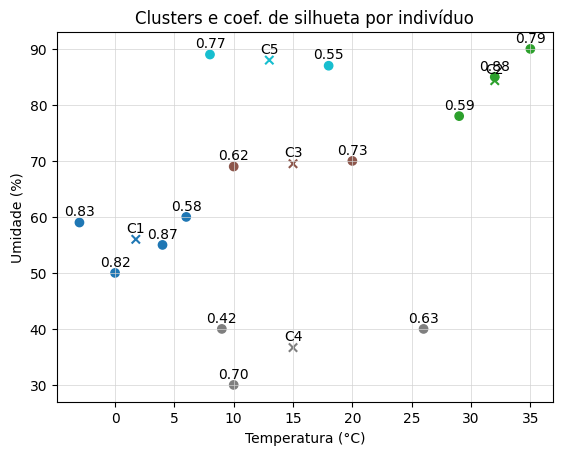

In [11]:
# Plota os centroides dos clusters
plt.style.use(meu_estilo)   # ggplot, bmh, classic
str_centroids = ['C{}'.format(i+1) for i in range(np.unique(labels).shape[0])]
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.unique(labels), marker='x', cmap='tab10')

for i, txt in enumerate(str_centroids):
    plt.annotate(f"{str_centroids [i]}",
                 (centroids[i, 0], centroids[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')


# Plota os pares (temp, umid) com cores diferentes em função do cluster ao qual estão associados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')

for i, txt in enumerate(X):
    plt.annotate(f"{escores_silhueta[i]:.2f}",
                 (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel("Temperatura (°C)")
plt.ylabel("Umidade (%)")
plt.title("Clusters e coef. de silhueta por indivíduo")
plt.show()

Observe que todos os indivíduos tem silhueta > 0.5 indicando que a clusterização está muito boa.

Exceção para o ponto (9, 40), pela sua proximidade aos indivíduos do cluster C1.

*Interessante mudar o número de cluster e ver como isso se reflete nos coeficientes de silhueta.*